# Checking microglial marker

# Checking microglial markers of datasets

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
adata1 = sc.read_h5ad('/mnt/data/mit_pfc_mathysCell2023/PFC_micro.h5ad')
adata2 = sc.read_h5ad('/mnt/data/seaad_dlpfc/seaad_microglia.h5ad') #/mnt/data/seaad_dlpfc/seaad_microglia.h5ad

In [3]:
print(adata1.obs.columns)
print(adata2.obs.columns)

Index(['projid', 'individualID_x', 'cell_type_high_resolution',
       'major_cell_type', 'barcode', 'batch', 'chemistry', 'individualID_y',
       'individualID', 'individualIdSource', 'species', 'sex', 'subject',
       'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype',
       'age_at_visit_max', 'age_first_ad_dx', 'age_death',
       'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc',
       'cogdx', 'dcfdx_lv', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt',
       'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo',
       'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier',
       'mt_outlier', 'n_genes', 'doublet_scores', 'predicted_doublets',
       'celltypist_cell_label', 'celltypist_conf_score',
       'celltypist_simplified'],
      dtype='object')
Index(['sample_id', 'Ne

In [4]:
adata2.obs.columns

Index(['sample_id', 'Neurotypical reference', 'Donor ID', 'Organism',
       'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)',
       'Race (choice=Black_ African American)',
       ...
       'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb',
       'pct_counts_hb', 'n_genes', 'doublet_scores', 'predicted_doublets',
       'doublet_label', 'outlier', 'mt_outlier'],
      dtype='object', length=152)

In [5]:
# Define a list of canonical microglial markers
microglia_markers = [
    "CX3CR1", "P2RY12", "TMEM119", "C1QA", "C1QB", "C1QC",
    "TREM2", "CSF1R", "SPI1", "APOE"
]

# Function to extract marker expression
def check_markers(adata, markers, n=5):
    # keep only genes present in the object
    genes_present = [g for g in markers if g in adata.var_names]
    print(f"Checking {len(genes_present)} markers in this dataset: {genes_present}")
    
    # Show average expression per marker
    expr = adata[:, genes_present].X
    if hasattr(expr, "toarray"):  # handle sparse matrix
        expr = expr.toarray()
    df = pd.DataFrame(expr, columns=genes_present)
    print(df.mean().sort_values(ascending=False).head(n))
    
    # Return for further use
    return df

print("=== adata1 (PFC_micro) ===")
df1 = check_markers(adata1, microglia_markers)

print("\n=== adata2 (seaad_microglia) ===")
df2 = check_markers(adata2, microglia_markers)


=== adata1 (PFC_micro) ===
Checking 10 markers in this dataset: ['CX3CR1', 'P2RY12', 'TMEM119', 'C1QA', 'C1QB', 'C1QC', 'TREM2', 'CSF1R', 'SPI1', 'APOE']
CSF1R     2.227285
P2RY12    1.557892
APOE      1.179158
C1QB      0.838613
CX3CR1    0.772836
dtype: float32

=== adata2 (seaad_microglia) ===
Checking 10 markers in this dataset: ['CX3CR1', 'P2RY12', 'TMEM119', 'C1QA', 'C1QB', 'C1QC', 'TREM2', 'CSF1R', 'SPI1', 'APOE']
CSF1R     3.584521
P2RY12    2.893840
APOE      2.730310
C1QB      2.052174
C1QC      1.483164
dtype: float32


/home/ubuntu/miniconda3/envs/scvi-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/home/ubuntu/miniconda3/envs/scvi-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


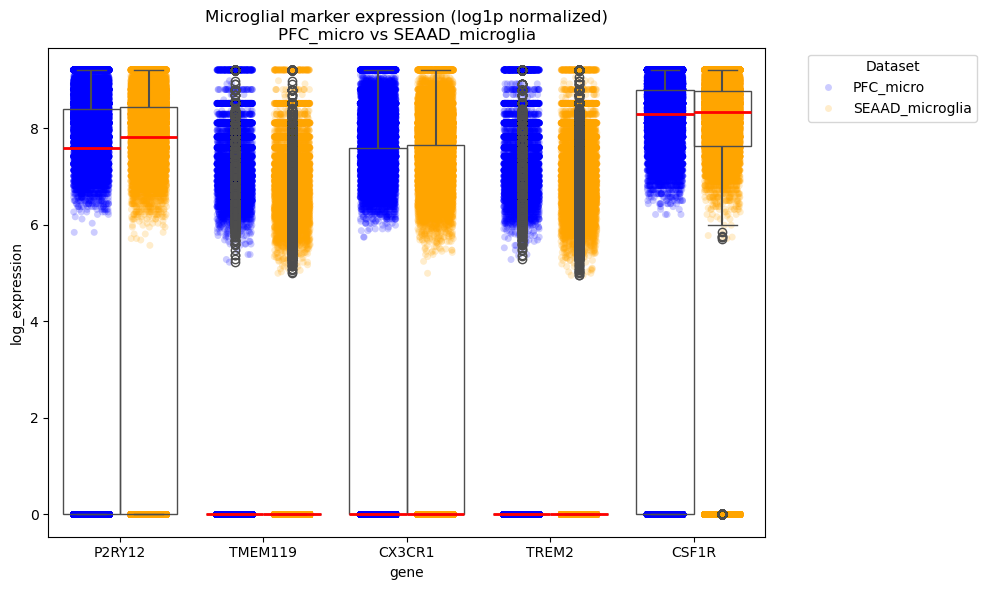

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [10]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---- Helper to extract marker expression consistently ----
def extract_expr(adata, markers, dataset_name):
    genes = [g for g in markers if g in adata.var_names]
    tmp = adata[:, genes].copy()
    # Normalize & log1p so both datasets are comparable
    sc.pp.normalize_total(tmp, target_sum=1e4)
    sc.pp.log1p(tmp)
    df = tmp.to_df()
    df = df.melt(var_name="gene", value_name="log_expression")
    df["dataset"] = dataset_name
    return df

# ---- Choose your markers ----
markers = ["P2RY12", "TMEM119", "CX3CR1", "TREM2", "CSF1R"]

# ---- Extract for both datasets ----
df1 = extract_expr(adata1, markers, "PFC_micro")
df2 = extract_expr(adata2, markers, "SEAAD_microglia")

# ---- Combine ----
expr_long = pd.concat([df1, df2], ignore_index=True)

# ---- Plot side-by-side ----
plt.figure(figsize=(10,6))

# Define palette: one color per dataset
palette = {"PFC_micro": "blue", "SEAAD_microglia": "orange"}

# Stripplot (dots = cells), colored by dataset
sns.stripplot(
    data=expr_long, x="gene", y="log_expression", 
    hue="dataset", dodge=True, jitter=0.25, alpha=0.2,
    palette=palette, zorder=1
)

# Boxplot overlay, colored by dataset
sns.boxplot(
    data=expr_long, x="gene", y="log_expression", 
    hue="dataset", dodge=True,
    showcaps=True, 
    boxprops={"facecolor": "none"},   # hollow box
    whiskerprops={"linewidth": 1.5},
    medianprops={"color": "red", "linewidth": 2},
    palette=palette, zorder=2
)

plt.title("Microglial marker expression (log1p normalized)\nPFC_micro vs SEAAD_microglia")

# Fix duplicate legends from stripplot + boxplot
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Dataset", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()
plt.figure(figsize=(10,6))


/home/ubuntu/miniconda3/envs/scvi-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/home/ubuntu/miniconda3/envs/scvi-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


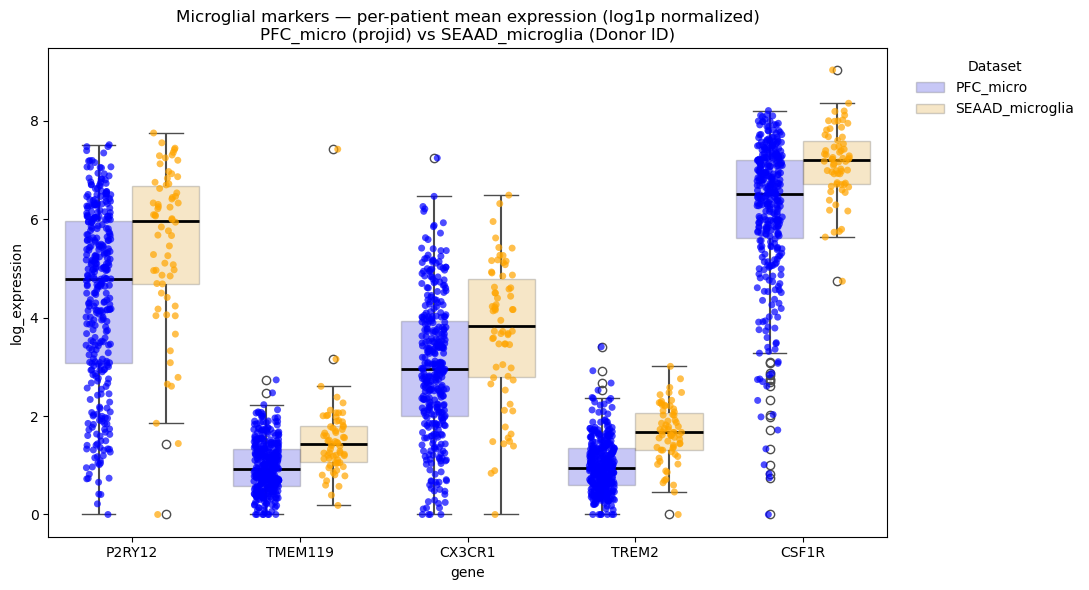

In [9]:


# ---- Helper: extract per-patient means for a gene list (consistent normalization) ----
def per_patient_means(adata, markers, dataset_name, groupby=None, target_sum=1e4):
    genes = [g for g in markers if g in adata.var_names]
    if len(genes) == 0:
        raise ValueError("None of the provided markers were found in var_names.")
    if groupby is None:
        groupby = pick_groupby(adata)
    # subset & normalize consistently
    tmp = adata[:, genes].copy()
    sc.pp.normalize_total(tmp, target_sum=target_sum)
    sc.pp.log1p(tmp)
    df = tmp.to_df()
    if groupby is not None:
        df[groupby] = adata.obs[groupby].astype(str).values
        # per-patient means (one row per patient per gene)
        df_means = (
            df.groupby(groupby, as_index=False)[genes]
              .mean()
              .melt(id_vars=[groupby], var_name="gene", value_name="log_expression")
        )
        df_means.rename(columns={groupby: "patient"}, inplace=True)
    else:
        # no group column found: treat all cells as one "patient"
        df_means = df[genes].mean(axis=0).reset_index()
        df_means.columns = ["gene", "log_expression"]
        df_means["patient"] = "all_cells"
    df_means["dataset"] = dataset_name
    return df_means, groupby


# ---- Extract per-patient means with explicit groupby ----
df1, _ = per_patient_means(adata1, markers, "PFC_micro", groupby="projid")
df2, _ = per_patient_means(adata2, markers, "SEAAD_microglia", groupby="Donor ID")
expr_pat = pd.concat([df1, df2], ignore_index=True)

# ---- Plot: one dot per patient ----
plt.figure(figsize=(11, 6))
palette = {"PFC_micro": "blue", "SEAAD_microglia": "orange"}

# Dots = each patient mean per gene
sns.stripplot(
    data=expr_pat, x="gene", y="log_expression",
    hue="dataset", dodge=True, jitter=0.15, alpha=0.7,
    palette=palette, zorder=2
)

# Boxes = distribution of patient means
sns.boxplot(
    data=expr_pat, x="gene", y="log_expression",
    hue="dataset", dodge=True,
    showcaps=True, boxprops={"alpha": 0.25},
    whiskerprops={"linewidth": 1.5},
    medianprops={"color": "black", "linewidth": 2},
    palette=palette, zorder=1
)

plt.title("Microglial markers — per-patient mean expression (log1p normalized)\nPFC_micro (projid) vs SEAAD_microglia (Donor ID)")

# Clean legend (remove duplicates)
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))  # preserve one handle per label
plt.legend(unique.values(), unique.keys(),
           title="Dataset", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

plt.tight_layout()
plt.show()


# UMAP

In [ ]:

GENE = "CSF1R"   # for mouse datasets this might be "Csf1r"

def ensure_umap(adata, n_neighbors=15, n_pcs=50):
    if "X_umap" not in adata.obsm:
        if "X_pca" not in adata.obsm:
            sc.pp.pca(adata, n_comps=min(n_pcs, adata.n_vars-1))
        sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=min(n_pcs, adata.obsm["X_pca"].shape[1]))
        sc.tl.umap(adata)

def pick_gene_name(adata, gene):
    # case-insensitive match for convenience
    lower = {g.lower(): g for g in adata.var_names}
    return lower.get(gene.lower(), None)

def extract_expr(adata, gene):
    """Returns 1D np.array of expression for gene (prefers .raw if present)."""
    g = pick_gene_name(adata, gene)
    if g is None:
        raise ValueError(f"Gene '{gene}' not found in var_names for this AnnData.")
    # prefer raw if available
    if adata.raw is not None and g in adata.raw.var_names:
        X = adata.raw[:, g].X
    else:
        X = adata[:, g].X
    if hasattr(X, "toarray"):
        X = X.toarray()
    X = np.ravel(X)
    return X

# 1) Make sure both have UMAPs
ensure_umap(adata1)
ensure_umap(adata2)

# 2) Get expression vectors (log1p-transform for visualization)
x1 = np.log1p(extract_expr(adata1, GENE))
x2 = np.log1p(extract_expr(adata2, GENE))

# Put into .obs temp columns for plotting
adata1.obs["_expr_log1p"] = x1
adata2.obs["_expr_log1p"] = x2

# 3) Shared color scale (e.g., 99th percentile to avoid outliers)
vmin = 0.0
vmax = float(np.nanpercentile(np.concatenate([x1, x2]), 99))

# 4) Side-by-side UMAPs
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sc.pl.umap(
    adata1, color="_expr_log1p", vmin=vmin, vmax=vmax,
    color_map="viridis", ax=axes[0], show=False
)
axes[0].set_title(f"adata1 • {GENE} log1p")

sc.pl.umap(
    adata2, color="_expr_log1p", vmin=vmin, vmax=vmax,
    color_map="viridis", ax=axes[1], show=False
)
axes[1].set_title(f"adata2 • {GENE} log1p")

plt.tight_layout()
plt.show()

# Optional: clean up temp columns later
# del adata1.obs["_expr_log1p"]; del adata2.obs["_expr_log1p"]


# All 3 datasets

## Loading

In [2]:
import scanpy as sc
import pandas as pd
import re
import numpy as np
import anndata as ads

adata1 = sc.read_h5ad("/mnt/data/mit_pfc_mathysCell2023/PFC_micro.h5ad")
adata2 = sc.read_h5ad("/mnt/data/seaad_dlpfc/seaad_microglia_fixed.h5ad")
adata3 = sc.read_h5ad("/home/ubuntu/human_PFC/dejaeg_preprocessing/microglia_filt.h5ad")

In [26]:
adata1 = sc.read_h5ad("/mnt/data/mit_pfc_mathysCell2023/PFC_filt_allgenes.h5ad")

KeyboardInterrupt: 

## Boxplot

In [ ]:
MG markers 
P2RY12
SALL1
SIGLECH
SPARC
TMEM119


🧠 Processing MIT_PFC_Mathys...


/home/ubuntu/.local/lib/python3.10/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


🧠 Processing SEAAD_DLPFC...


/home/ubuntu/.local/lib/python3.10/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


🧠 Processing DEJAEG_Micro...


/home/ubuntu/.local/lib/python3.10/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


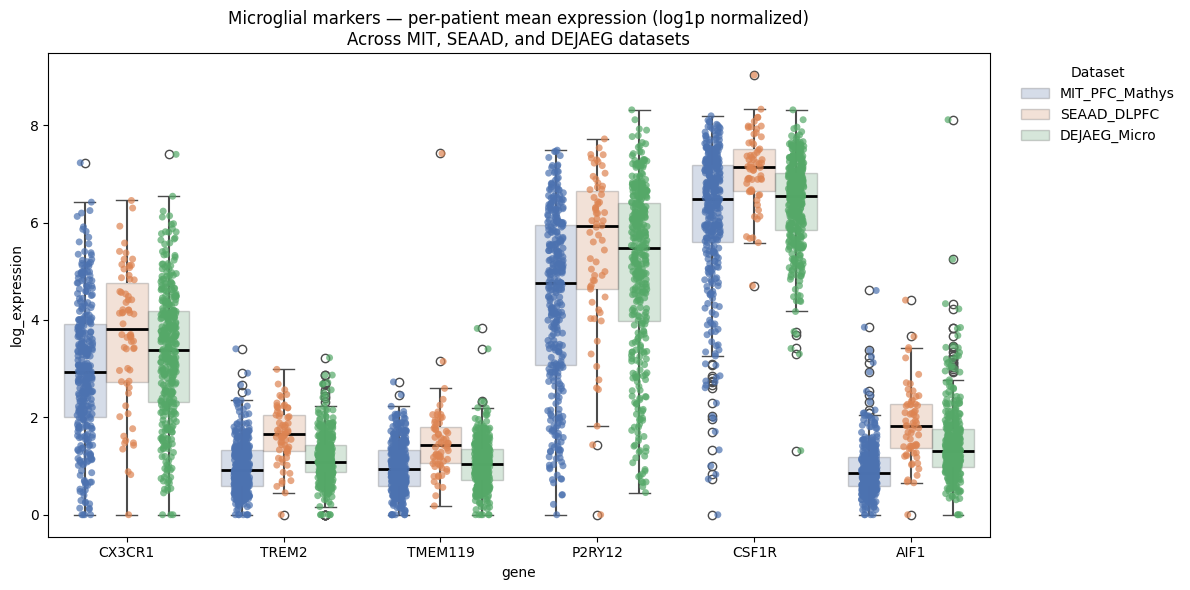

In [7]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Helper: extract per-patient means for a gene list ----
def per_patient_means(adata, markers, dataset_name, groupby, target_sum=1e4):
    genes = [g for g in markers if g in adata.var_names]
    if len(genes) == 0:
        raise ValueError(f"No genes found in {dataset_name}: {markers}")
    
    # Normalize & log transform
    tmp = adata[:, genes].copy()
    sc.pp.normalize_total(tmp, target_sum=target_sum)
    sc.pp.log1p(tmp)
    
    # Create dataframe
    df = tmp.to_df()
    df[groupby] = adata.obs[groupby].astype(str).values
    
    # Per-patient means
    df_means = (
        df.groupby(groupby, as_index=False)[genes]
          .mean()
          .melt(id_vars=[groupby], var_name="gene", value_name="log_expression")
    )
    df_means.rename(columns={groupby: "patient"}, inplace=True)
    df_means["dataset"] = dataset_name
    return df_means


# ---- Define dataset info ----
adata1 = sc.read_h5ad("/mnt/data/mit_pfc_mathysCell2023/PFC_micro.h5ad")
adata2 = sc.read_h5ad("/mnt/data/seaad_dlpfc/seaad_microglia_fixed.h5ad")
adata3 = sc.read_h5ad("/home/ubuntu/human_PFC/dejaeg_preprocessing/microglia_filt.h5ad")

datasets = [
    ("MIT_PFC_Mathys", adata1, "individualID"),
    ("SEAAD_DLPFC", adata2, "Donor ID"),
    ("DEJAEG_Micro", adata3, "individualID")
]

# ---- Define your markers ----
markers = ["CX3CR1", "TREM2", "TMEM119", "P2RY12", "CSF1R", "AIF1"]  # example microglial genes

# ---- Compute per-patient means across all datasets ----
expr_list = []
for name, adata, groupby in datasets:
    print(f"🧠 Processing {name}...")
    df, = (per_patient_means(adata, markers, name, groupby),)
    expr_list.append(df)

expr_all = pd.concat(expr_list, ignore_index=True)

# ---- Plot ----
plt.figure(figsize=(12, 6))
palette = {
    "MIT_PFC_Mathys": "#4C72B0", 
    "SEAAD_DLPFC": "#DD8452", 
    "DEJAEG_Micro": "#55A868"
}

# Dots = patient-level mean expression
sns.stripplot(
    data=expr_all, x="gene", y="log_expression",
    hue="dataset", dodge=True, jitter=0.15, alpha=0.7,
    palette=palette, zorder=2
)

# Boxes = per-patient distribution
sns.boxplot(
    data=expr_all, x="gene", y="log_expression",
    hue="dataset", dodge=True,
    showcaps=True, boxprops={"alpha": 0.25},
    whiskerprops={"linewidth": 1.5},
    medianprops={"color": "black", "linewidth": 2},
    palette=palette, zorder=1
)

plt.title("Microglial markers — per-patient mean expression (log1p normalized)\nAcross MIT, SEAAD, and DEJAEG datasets")

# Clean up legend (remove duplicates)
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(),
           title="Dataset", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

plt.tight_layout()
plt.savefig("microglial_markers_expression.png", dpi=300, bbox_inches="tight")
plt.show()


🧠 Processing MIT_PFC_Mathys...


/home/ubuntu/.local/lib/python3.10/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


🧠 Processing SEAAD_DLPFC...


/home/ubuntu/.local/lib/python3.10/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


🧠 Processing DEJAEG_Micro...


/home/ubuntu/.local/lib/python3.10/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


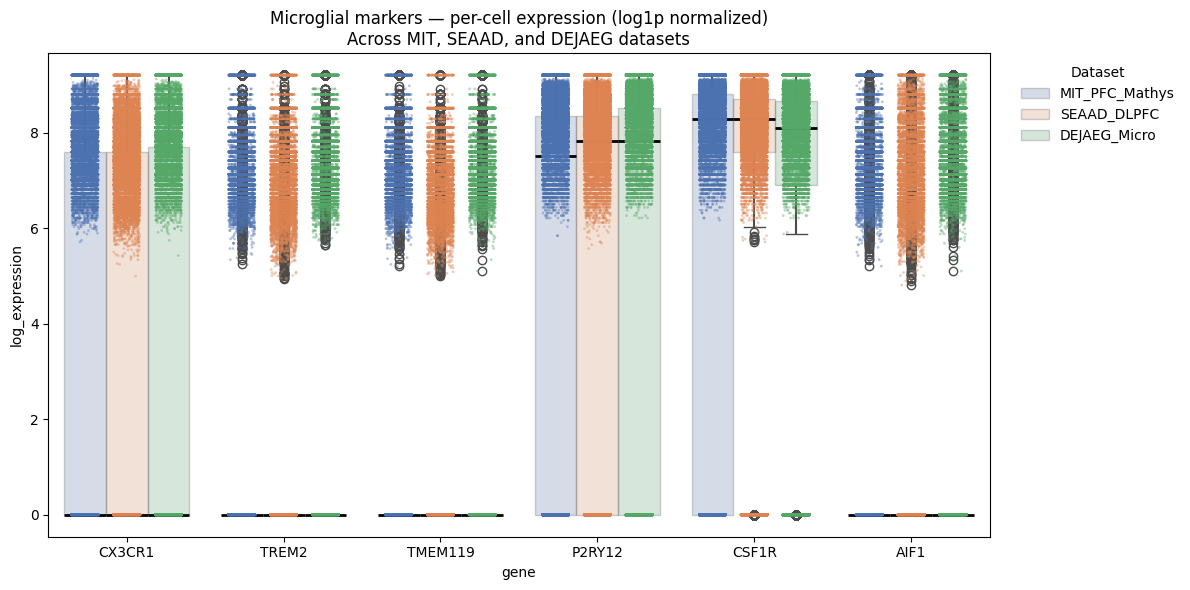

In [9]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Helper: extract per-cell normalized expression for a gene list ----
def per_cell_means(adata, markers, dataset_name, target_sum=1e4):
    genes = [g for g in markers if g in adata.var_names]
    if len(genes) == 0:
        raise ValueError(f"No genes found in {dataset_name}: {markers}")
    
    tmp = adata[:, genes].copy()
    sc.pp.normalize_total(tmp, target_sum=target_sum)
    sc.pp.log1p(tmp)
    
    df = tmp.to_df()
    df["dataset"] = dataset_name
    return df


# ---- Load datasets ----
adata1 = sc.read_h5ad("/mnt/data/mit_pfc_mathysCell2023/PFC_micro.h5ad")
adata2 = sc.read_h5ad("/mnt/data/seaad_dlpfc/seaad_microglia_fixed.h5ad")
adata3 = sc.read_h5ad("/home/ubuntu/human_PFC/dejaeg_preprocessing/microglia_filt.h5ad")

datasets = [
    ("MIT_PFC_Mathys", adata1),
    ("SEAAD_DLPFC", adata2),
    ("DEJAEG_Micro", adata3)
]

# ---- Define your markers ----
markers = ["CX3CR1", "TREM2", "TMEM119", "P2RY12", "CSF1R", "AIF1"] 

# ---- Extract normalized expression per cell ----
expr_list = []
for name, adata in datasets:
    print(f"🧠 Processing {name}...")
    df = per_cell_means(adata, markers, name)
    expr_list.append(df)

expr_all = pd.concat(expr_list, ignore_index=True)

# ---- Melt to long format for plotting ----
expr_long = expr_all.melt(id_vars="dataset", var_name="gene", value_name="log_expression")

# ---- Plot ----
plt.figure(figsize=(12, 6))
palette = {
    "MIT_PFC_Mathys": "#4C72B0", 
    "SEAAD_DLPFC": "#DD8452", 
    "DEJAEG_Micro": "#55A868"
}

# Dots = each cell’s normalized expression
sns.stripplot(
    data=expr_long, x="gene", y="log_expression",
    hue="dataset", dodge=True, jitter=0.25, alpha=0.4,
    size=2, palette=palette
)

# Overlay boxplots for overall distribution
sns.boxplot(
    data=expr_long, x="gene", y="log_expression",
    hue="dataset", dodge=True, showcaps=True,
    boxprops={"alpha": 0.25},
    whiskerprops={"linewidth": 1.5},
    medianprops={"color": "black", "linewidth": 2},
    palette=palette
)

plt.title("Microglial markers — per-cell expression (log1p normalized)\nAcross MIT, SEAAD, and DEJAEG datasets")

# Clean up legend
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(),
           title="Dataset", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

plt.tight_layout()
plt.savefig("microglial_markers_expression_per_cell.png", dpi=300, bbox_inches="tight")
plt.show()


In [17]:

import mygene

def map_varnames_to_symbols(adata, species="human"):
    """Map Ensembl/Gencode IDs to official gene symbols if needed."""
    mg = mygene.MyGeneInfo()
    ids = adata.var_names.tolist()
    print(f"🔎 Mapping {len(ids)} gene IDs → gene symbols ...")
    out = mg.querymany(ids, scopes="symbol,ensembl.gene", fields="symbol", species=species)

    # Build mapping
    id_to_symbol = {q["query"]: q.get("symbol") for q in out if "query" in q}
    adata.var["gene_symbol"] = adata.var_names.to_series().map(id_to_symbol)

    n_mapped = adata.var["gene_symbol"].notna().sum()
    print(f"✅ {n_mapped} / {len(ids)} genes mapped to symbols")

    # Replace var_names with gene symbols when available
    new_names = adata.var["gene_symbol"].copy()
    new_names[new_names.isna()] = adata.var_names[new_names.isna()]  # fallback to original ID if unmapped
    adata.var_names = new_names
    adata.var_names_make_unique()

    return adata

adata1 = map_varnames_to_symbols(adata1)
for g in ["CX3CR1","TREM2","TMEM119","P2RY12","CSF1R","AIF1"]:
    if g in adata1.var_names:
        print(f"✅ {g} found")
    else:
        print(f"❌ {g} missing")


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


🔎 Mapping 2000 gene IDs → gene symbols ...


60 input query terms found dup hits:	[('LINC01346', 2), ('LINC02567', 2), ('RNU6ATAC35P', 2), ('LINC01870', 2), ('LINC01832', 2), ('LINC0
603 input query terms found no hit:	['AL390719.2', 'AL139246.3', 'BX005132.1', 'AL139424.1', 'AL139158.3', 'AC093151.2', 'AC099795.1', '


✅ 1397 / 2000 genes mapped to symbols
❌ CX3CR1 missing
❌ TREM2 missing
❌ TMEM119 missing
❌ P2RY12 missing
❌ CSF1R missing
❌ AIF1 missing


In [18]:
import pandas as pd

# Preview first 50 gene IDs that failed to map
unmapped = adata1.var[adata1.var["gene_symbol"].isna()].index[:50].tolist()
print(unmapped)


['AL390719.2', 'AL139246.3', 'BX005132.1', 'AL139424.1', 'AL139158.3', 'AC093151.2', 'AC099795.1', 'AL445183.2', 'AL035415.1', 'AC097066.1', 'AL354949.1', 'AL583808.2', 'CYR61', 'AL512638.2', 'AL157904.1', 'AC239859.3', 'AC245100.7', 'AL365181.1', 'AL365181.4', 'AL138899.1', 'AL354714.1', 'AL121983.1', 'AL390718.1', 'AL445228.1', 'FAM129A', 'AL357793.1', 'AL365258.1', 'AL591846.2', 'AC093581.1', 'AL136988.1', 'AL160408.1', 'AL590490.1', 'AL591885.1', 'C1orf100', 'AL451007.3', 'BX323046.1', 'AL591848.2', 'AL672291.1', 'AC105393.2', 'AC018685.2', 'AC010907.2', 'MIR7515HG', 'AC010904.2', 'AC007463.1', 'AC082651.1', 'AC018742.1', 'AL133247.1', 'AC019171.1', 'AC009971.1', 'AC139712.3']


In [19]:
pd.Series([x.split('.')[0][:4] for x in adata1.var_names]).value_counts().head(10)


LINC    149
AC00     92
AC01     56
AC02     44
AC09     41
AP00     35
AC10     31
AC07     24
AL13     19
AC08     19
Name: count, dtype: int64

In [20]:
!pip install biomart
from biomart import BiomartServer
import pandas as pd

# Connect to Ensembl BioMart
server = BiomartServer("http://www.ensembl.org/biomart")
dataset = server.datasets['hsapiens_gene_ensembl']

# Query mapping table
response = dataset.search({
    'attributes': ['ensembl_gene_id', 'ensembl_transcript_id', 'external_gene_name']
})

# Convert to DataFrame
mapping = []
for line in response.iter_lines():
    mapping.append(line.decode().split("\t"))
mapping_df = pd.DataFrame(mapping, columns=["ensembl_gene_id", "ensembl_transcript_id", "gene_symbol"])

# Build lookup dicts
ensembl_to_symbol = pd.Series(mapping_df["gene_symbol"].values,
                              index=mapping_df["ensembl_transcript_id"]).to_dict()
ensembl_geneid_to_symbol = pd.Series(mapping_df["gene_symbol"].values,
                                     index=mapping_df["ensembl_gene_id"]).to_dict()

print(f"✅ Mapping table loaded with {len(mapping_df)} entries.")


Defaulting to user installation because normal site-packages is not writeable
✅ Mapping table loaded with 533740 entries.


In [22]:
import re
import pandas as pd

def map_mathys_genes_with_biomart(adata, ensembl_to_symbol, ensembl_geneid_to_symbol):
    var_names = adata.var_names.to_series()

    # Try transcript IDs first (ENST...) then gene IDs (ENSG...)
    mapped = var_names.map(ensembl_to_symbol)
    unmapped = mapped.isna()

    if unmapped.sum() > 0:
        stripped = var_names[unmapped].str.split(".").str[0]
        mapped.loc[unmapped] = stripped.map(ensembl_geneid_to_symbol)

    adata.var["gene_symbol"] = mapped

    # ✅ FIX: convert Index to Series before using fillna()
    adata.var_names = adata.var["gene_symbol"].fillna(pd.Series(adata.var_names, index=adata.var.index))
    adata.var_names_make_unique()

    n_mapped = mapped.notna().sum()
    print(f"✅ {n_mapped} / {len(adata.var_names)} features mapped to gene symbols")
    return adata

adata1 = map_mathys_genes_with_biomart(adata1, ensembl_to_symbol, ensembl_geneid_to_symbol)

for g in ["CX3CR1", "TREM2", "TMEM119", "P2RY12", "CSF1R", "AIF1"]:
    print(f"{g}: {'✅ found' if g in adata1.var_names else '❌ missing'}")


✅ 0 / 2000 features mapped to gene symbols
CX3CR1: ❌ missing
TREM2: ❌ missing
TMEM119: ❌ missing
P2RY12: ❌ missing
CSF1R: ❌ missing
AIF1: ❌ missing


In [23]:
import re

prefix_counts = pd.Series([re.match(r'^[A-Z]+', g).group(0) if re.match(r'^[A-Z]+', g) else None for g in adata1.var_names]).value_counts()
print(prefix_counts.head(20))


AC      378
LINC    149
AL      129
AP       35
SLC      29
COL      14
FAM      13
TMEM     13
MT       12
RPS      12
RPL      11
OR       10
CDH       9
ZNF       9
C         9
GRM       8
RGS       7
Z         7
PCDH      7
ATP       7
Name: count, dtype: int64


In [24]:
print(adata1.shape)


(57452, 2000)


In [ ]:
for g in ["CX3CR1","TREM2","TMEM119","P2RY12","CSF1R","AIF1"]:
    print(f"{g}: {'✅ found' if g in adata1.var_names else '❌ missing'}")


In [11]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Helper: extract per-Leiden-cluster mean expression for given genes ----
def per_cluster_means(adata, markers, dataset_name, cluster_key="leiden", target_sum=1e4):
    genes = [g for g in markers if g in adata.var_names]
    if len(genes) == 0:
        raise ValueError(f"No genes found in {dataset_name}: {markers}")

    if cluster_key not in adata.obs.columns:
        raise ValueError(f"'{cluster_key}' not found in adata.obs for {dataset_name}. Run sc.tl.leiden first.")

    # Normalize & log transform
    tmp = adata[:, genes].copy()
    sc.pp.normalize_total(tmp, target_sum=target_sum)
    sc.pp.log1p(tmp)

    # Create dataframe with expression + cluster assignment
    df = tmp.to_df()
    df[cluster_key] = adata.obs[cluster_key].astype(str).values

    # Compute mean per cluster per gene
    df_means = (
        df.groupby(cluster_key, as_index=False)[genes]
          .mean()
          .melt(id_vars=[cluster_key], var_name="gene", value_name="log_expression")
    )

    df_means.rename(columns={cluster_key: "cluster"}, inplace=True)
    df_means["dataset"] = dataset_name
    return df_means


# ---- Load datasets ----
adata1 = sc.read_h5ad("/mnt/data/mit_pfc_mathysCell2023/PFC_micro.h5ad")
adata2 = sc.read_h5ad("/mnt/data/seaad_dlpfc/seaad_microglia_fixed.h5ad")
adata3 = sc.read_h5ad("/home/ubuntu/human_PFC/dejaeg_preprocessing/microglia_filt.h5ad")

datasets = [
    ("MIT_PFC_Mathys", adata1),
    ("SEAAD_DLPFC", adata2),
    ("DEJAEG_Micro", adata3)
]

# ---- Define marker genes ----
markers = ["CX3CR1", "TREM2", "TMEM119", "P2RY12", "CSF1R", "AIF1"]

# ---- Compute per-cluster means ----
expr_list = []

for name, adata in datasets:
    print(f"\n🧠 Processing {name}...")

    # ✅ Step 1: Ensure PCA exists
    if "X_pca" not in adata.obsm.keys():
        print(f"⚙️ Computing PCA for {name}...")
        sc.pp.normalize_total(adata)
        sc.pp.log1p(adata)
        sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)
        sc.pp.scale(adata, max_value=10)
        sc.tl.pca(adata, svd_solver="arpack")

    # ✅ Step 2: Ensure neighbors exist
    if "neighbors" not in adata.uns:
        print(f"⚙️ Computing neighbors for {name}...")
        sc.pp.neighbors(adata, use_rep="X_pca")

    # ✅ Step 3: Run Leiden if missing
    if "leiden" not in adata.obs.columns:
        print(f"⚙️ Running Leiden clustering for {name} (resolution=0.5)...")
        sc.tl.leiden(adata, resolution=0.5)

    # ✅ Step 4: Compute per-cluster means for markers
    df = per_cluster_means(adata, markers, name)
    expr_list.append(df)

# ---- Combine results ----
expr_all = pd.concat(expr_list, ignore_index=True)

# ---- Plot ----
plt.figure(figsize=(12, 6))
palette = {
    "MIT_PFC_Mathys": "#4C72B0",
    "SEAAD_DLPFC": "#DD8452",
    "DEJAEG_Micro": "#55A868"
}

sns.stripplot(
    data=expr_all, x="gene", y="log_expression",
    hue="dataset", dodge=True, jitter=0.15, alpha=0.8,
    palette=palette, zorder=2, size=6
)

sns.boxplot(
    data=expr_all, x="gene", y="log_expression",
    hue="dataset", dodge=True, showcaps=True,
    boxprops={"alpha": 0.25}, whiskerprops={"linewidth": 1.5},
    medianprops={"color": "black", "linewidth": 2},
    palette=palette, zorder=1
)

plt.title("Microglial markers — per-Leiden-cluster mean expression (log1p normalized)\nAcross MIT, SEAAD, and DEJAEG datasets")

# Clean legend
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(),
           title="Dataset", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

plt.tight_layout()
plt.savefig("microglial_markers_expression_per_cluster.png", dpi=300, bbox_inches="tight")
plt.show()



🧠 Processing MIT_PFC_Mathys...
⚙️ Computing PCA for MIT_PFC_Mathys...


/home/ubuntu/miniconda3/envs/scvi-env-clean/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


⚙️ Computing neighbors for MIT_PFC_Mathys...
⚙️ Running Leiden clustering for MIT_PFC_Mathys (resolution=0.5)...


ValueError: No genes found in MIT_PFC_Mathys: ['CX3CR1', 'TREM2', 'TMEM119', 'P2RY12', 'CSF1R', 'AIF1']

In [12]:
print(adata1.var_names[:10])


Index(['LINC01342', 'AL390719.2', 'AL139246.3', 'PRDM16', 'LINC01346', 'AJAP1',
       'BX005132.1', 'AL139424.1', 'DISP3', 'KAZN'],
      dtype='object', name='index')


In [13]:
for name, adata in datasets:
    found = [g for g in markers if g.lower() in [v.lower() for v in adata.var_names]]
    missing = [g for g in markers if g.lower() not in [v.lower() for v in adata.var_names]]
    print(f"\n{name}:")
    print(f"✅ Found: {found}")
    print(f"❌ Missing: {missing}")



MIT_PFC_Mathys:
✅ Found: []
❌ Missing: ['CX3CR1', 'TREM2', 'TMEM119', 'P2RY12', 'CSF1R', 'AIF1']

SEAAD_DLPFC:
✅ Found: ['CX3CR1', 'TREM2', 'TMEM119', 'P2RY12', 'CSF1R', 'AIF1']
❌ Missing: []

DEJAEG_Micro:
✅ Found: ['CX3CR1', 'TREM2', 'TMEM119', 'P2RY12', 'CSF1R', 'AIF1']
❌ Missing: []


In [14]:
markers = ["CX3CR1", "TREM2", "TMEM119", "P2RY12", "CSF1R", "AIF1"]

for gene in markers:
    matches = [g for g in adata1.var_names if gene.lower() in g.lower()]
    print(f"{gene}: {matches[:10]}")  # show up to 10 matches


CX3CR1: []
TREM2: []
TMEM119: []
P2RY12: []
CSF1R: []
AIF1: []


In [15]:
import re

patterns = sum([
    adata1.var_names.str.startswith(prefix).sum()
    for prefix in ["ENSG", "ENSMUSG", "AL", "AC", "RP"]
])
print(f"Number of gene IDs with Ensembl/Gencode-like prefixes: {patterns}")


Number of gene IDs with Ensembl/Gencode-like prefixes: 541
